In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import wget
import os
import shapely
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon

In [42]:
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")
map_data = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k')

In [43]:
state_abbreviation_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 
    'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/sphill12/Data608/refs/heads/main/jobs.csv", encoding="utf-16")
data['Full_State'] = data['State'].map(state_abbreviation_to_name)
data = data[~data["Jobs_Group"].isin(["CFO","Others","Controller","Finance"])]

In [45]:
median = pd.DataFrame(data[["Jobs_Group","Mean_Salary","Full_State"]].dropna(subset = "Mean_Salary").groupby(by = ["Jobs_Group","Full_State"]).median())
median = median.reset_index()

In [46]:
indexing = median.groupby("Full_State").idxmax().reset_index()
indexing.head()

,Full_State,Jobs_Group,Mean_Salary
0,Alabama,422,195
1,Alaska,423,423
2,Arizona,424,424
3,Arkansas,377,247
4,California,425,343


In [47]:
grouped_median = median.iloc[indexing["Mean_Salary"]]
grouped_median 

,Jobs_Group,Full_State,Mean_Salary
195,Data Engineer,Alabama,186000.00
423,Statistician/Mathemathics,Alaska,126303.50
424,Statistician/Mathemathics,Arizona,149946.50
247,Data Scientist,Arkansas,161500.00
343,ML/AI Engineer,California,175000.00
344,ML/AI Engineer,Colorado,172000.00
250,Data Scientist,Connecticut,151250.00
346,ML/AI Engineer,Delaware,205000.00
347,ML/AI Engineer,Florida,128340.00
348,ML/AI Engineer,Georgia,154650.00


In [48]:
map_data =map_data.rename(columns= {"NAME":"Full_State"})

In [49]:
median.rename(columns= {"Mean_Salary": "Median_Salary"})
final_data = pd.merge(map_data, grouped_median, on= "Full_State")

In [50]:
final_data= final_data.rename(columns={"Mean_Salary":"Median_Salary"})
final_data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,Full_State,LSAD,ALAND,AWATER,geometry,Jobs_Group,Median_Salary
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",Operations Analyst,107029.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",ML/AI Engineer,151350.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",Data Scientist,112607.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",ML/AI Engineer,150000.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",Data Engineer,111250.0


In [51]:
def makeColorColumn(gdf, variable, vmin, vmax):
    norm = mcolors.Normalize(vmin = vmin , vmax = vmax, clip = True)
    mapper = plt.cm.ScalarMappable(norm = norm, cmap= plt.cm.YlOrBr)
    gdf["value_determined_color"] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

In [52]:
final_data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,Full_State,LSAD,ALAND,AWATER,geometry,Jobs_Group,Median_Salary
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",Operations Analyst,107029.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",ML/AI Engineer,151350.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",Data Scientist,112607.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",ML/AI Engineer,150000.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",Data Engineer,111250.0


c:\Python312\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

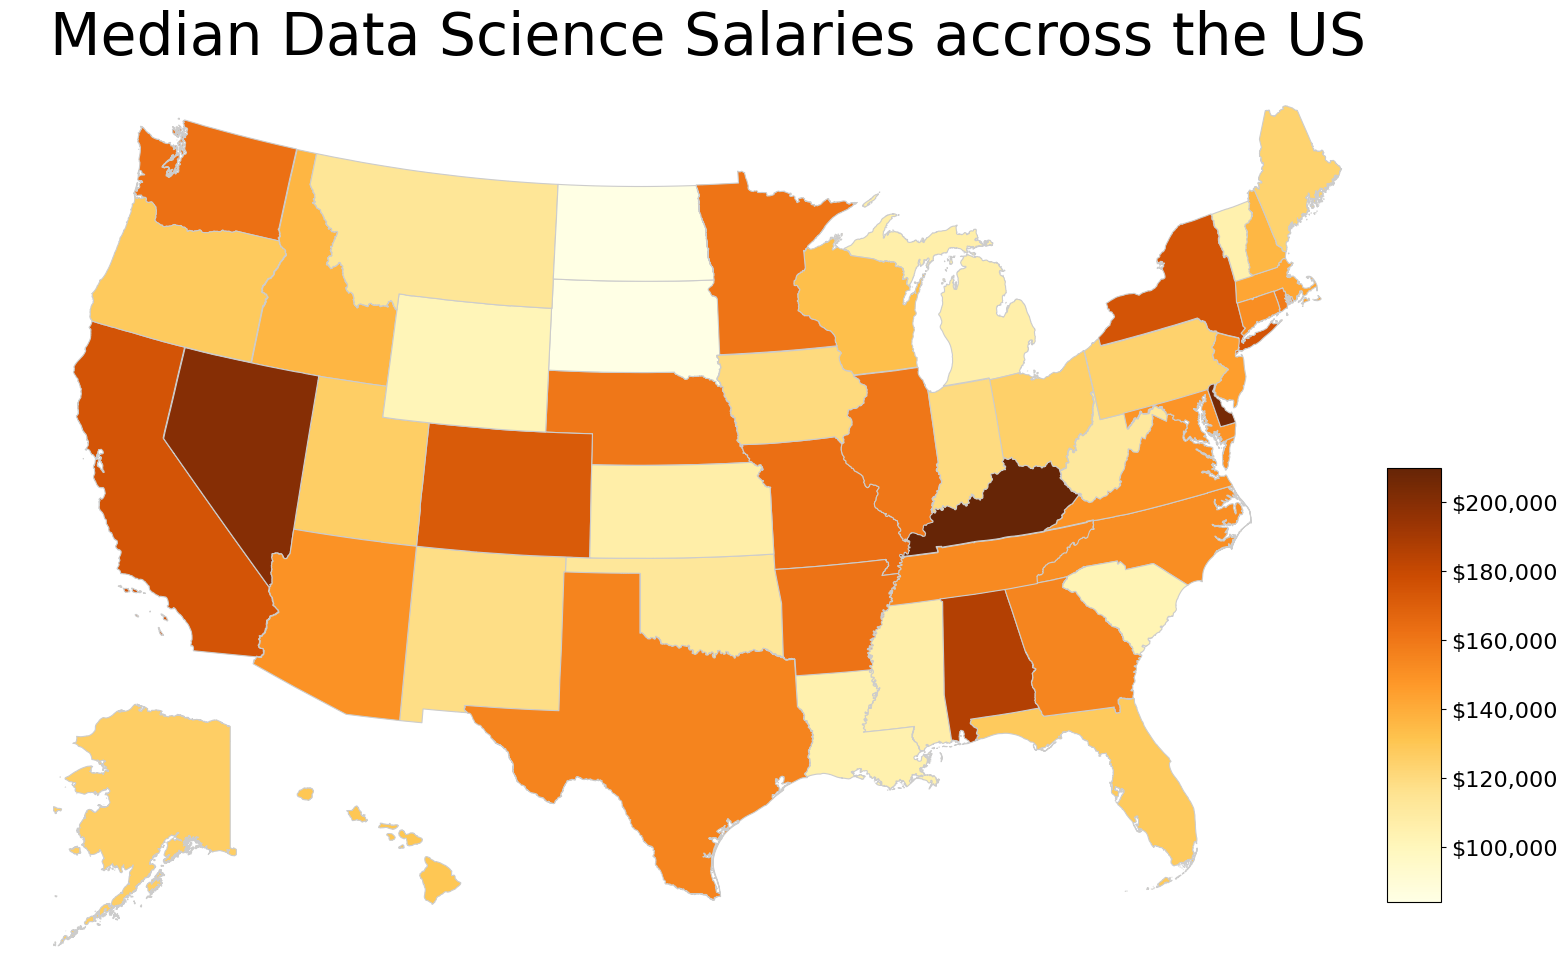

In [59]:
## Variable of interest

visframe =final_data.to_crs({'init':'epsg:2163'})
variable = "Median_Salary"
colormap = "YlOrBr"

## Set the range for the color gradient
vmin,vmax = final_data["Median_Salary"].min(), final_data["Median_Salary"].max()
gdf = makeColorColumn(final_data, variable, vmin, vmax)
fix, ax = plt.subplots(1,figsize = (18,14))
ax.axis("off")
hfont = {'fontname':'Helvetica'}
ax.set_title("Median Data Science Salaries accross the US", fontdict = {'fontsize':'42','fontweight': '1'})
fig =ax.get_figure()

cbax=  fig.add_axes([0.89, 0.21, 0.03, 0.31])

sm =plt.cm.ScalarMappable(cmap= colormap, norm = plt.Normalize(vmin = vmin, vmax = vmax))

sm._A  = []


fig.colorbar(sm, cax = cbax)
tick_font_size = 16
cbax.tick_params(labelsize = tick_font_size)

for row in visframe.itertuples():
    if row.STUSPS not in ["AK","HI"]:
        vf = visframe[visframe.STUSPS == row.STUSPS]
        c= final_data[final_data.STUSPS == row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color = c, linewidth = 0.8, ax = ax, edgecolor = '0.8')

def salary_formatter(x,pos):
    return f'${int(x):,}'
cbar = fig.colorbar(sm, cax=cbax)

cbar.ax.yaxis.set_major_formatter(FuncFormatter(salary_formatter))

## Alaska
akax = fig.add_axes([.1,.17,.2,.19])
akax.axis('off')

polygon = Polygon([(-170,50), (-170,72),(-140, 72), (-140,50)])
alaska_gdf = final_data[final_data.STUSPS == "AK"]
alaska_gdf.clip(polygon).plot(color= final_data[final_data.STUSPS == "AK"].value_determined_color, linewidth = 0.8, ax= akax, edgecolor= "0.8")

hiax= fig.add_axes([.28,.20,.1,.1])
hiax.axis("off")
hipolygon = Polygon([(-160,0), (-160,90), (-120,90),(-120,0)])
hawaii_gdf = final_data[final_data.STUSPS == "HI"]
hawaii_gdf.clip(hipolygon).plot(color=  hawaii_gdf["value_determined_color"].item(), linewidth = 0.8, ax=hiax, edgecolor = '0.8')

In [55]:
data

,ID,Job,Jobs_Group,Profile,Remote,Company,Location,City,State,Salary,Frecuency_Salary,Low_Salary,High_Salary,Mean_Salary,Skills,Full_State
0,sj_1e37379f40861c74,Business Analyst,Business Analyst,NaN,NaN,CyberCoders,"Torrington, CT 06790",Torrington,CT,"$80,000 - $110,000 por año",año,80000.0,110000.0,95000.0,[],Connecticut
1,sj_a2789bdbc24f4aed,RPA Business Systems Analyst,Business Analyst,NaN,NaN,Amerihealth,"Philadelphia, PA 19107 (City Center East area)...",Philadelphia,PA,NaN,NaN,NaN,NaN,NaN,"['Office', 'SQL', 'Bachelor']",Pennsylvania
2,job_15e7be7c9bf658e3,Quantitive Business Analyst - Strategic Data S...,Business Analyst,NaN,NaN,Apple,"Austin, TX+1 location",Austin,TX,NaN,NaN,NaN,NaN,NaN,"['Python', 'SQL', 'Bachelor']",Texas
3,job_e8519e1ec2d60a16,Business Line Product Lifecycle Management (PL...,Business Analyst,Junior,NaN,NXP Semiconductors,"Austin, TX (West Oak Hill area)",Austin,TX,NaN,NaN,NaN,NaN,NaN,['Bachelor'],Texas
4,job_0545baf6560877d1,Global Markets Operations Asset Services Ops S...,Operations Analyst,Senior,NaN,Bank of America,"Jacksonville, FL 32246 (Windy Hill area)+4 loc...",Jacksonville,FL,NaN,NaN,NaN,NaN,NaN,['Excel'],Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106891,job_aaf5465b12a2e3bd,Junior Governance & Reporting Analyst (Hybrid ...,Financial Analyst,Junior,Hybrid,City and County of San Francisco,"San Francisco, CA 94102 (Tenderloin area)",San Francisco,CA,"$72,150 - $87,724 por año",año,72150.0,87724.0,79937.0,"['Oracle', 'Access', 'Office']",California
106898,job_36fe092f4ba86bc8,Business Consultant/Virtual CFO,Business Analyst,NaN,NaN,BerganKDV,"Saint Cloud, MN 56301+7 ubicaciones",Saint Cloud,MN,NaN,NaN,NaN,NaN,NaN,['CPA'],Minnesota
106931,job_ca321642788ada0c,Projeteur / Projeteuse BIM électricité CFO CFA,Business Intelligence,NaN,NaN,Artelia,"Rochelle, LA",Rochelle,LA,NaN,NaN,NaN,NaN,NaN,['CFA'],Louisiana
106956,job_9c5f8b2c8272f5b9,Financial Reporting & Accounting Manager,Financial Analyst,Lead,NaN,Koch Industries,"Atlanta, GA 30303 (Downtown area)+2 ubicaciones",Atlanta,GA,NaN,NaN,NaN,NaN,NaN,"['Excel', 'Office']",Georgia


In [56]:
data["Jobs_Group"].unique()

array(['Business Analyst', 'Operations Analyst', 'Financial Analyst',
       'Business Intelligence', 'Data Analyst', 'Analyst',
       'Data Engineer', 'Data Scientist', 'Statistician/Mathemathics',
       'ML/AI Engineer'], dtype=object)

In [57]:
data["Jobs_Group"].unique()
b_analyst= data[data["Jobs_Group"]== "Business Analyst"][["Jobs_Group","Mean_Salary"]].dropna()
op_analyst = data[data["Jobs_Group"]== "Operations Analyst"][["Jobs_Group","Mean_Salary"]].dropna()
fin_analyst =data[data["Jobs_Group"]== "Financial Analyst"][["Jobs_Group","Mean_Salary"]].dropna()
business_int = data[data["Jobs_Group"]== "Business Intelligence"][["Jobs_Group","Mean_Salary"]].dropna()
data_analyst = data[data["Jobs_Group"]== "Data Analyst"][["Jobs_Group","Mean_Salary"]].dropna()
analyst = data[data["Jobs_Group"]== "Analyst"][["Jobs_Group","Mean_Salary"]].dropna()
data_engineer = data[data["Jobs_Group"]== "Data Engineer"][["Jobs_Group","Mean_Salary"]].dropna()
data_scientist = data[data["Jobs_Group"]== "Data Scientist"][["Jobs_Group","Mean_Salary"]].dropna()
statistician = data[data["Jobs_Group"]== "Statistician/Mathemathics"][["Jobs_Group","Mean_Salary"]].dropna()
ml_engineer = data[data["Jobs_Group"]== "ML/AI Engineer"][["Jobs_Group","Mean_Salary"]].dropna()

job_list= [b_analyst,
           op_analyst,
           fin_analyst,
           business_int,
           data_analyst,
           analyst,
           data_engineer,
           data_scientist,
           statistician,
           ml_engineer
           ]

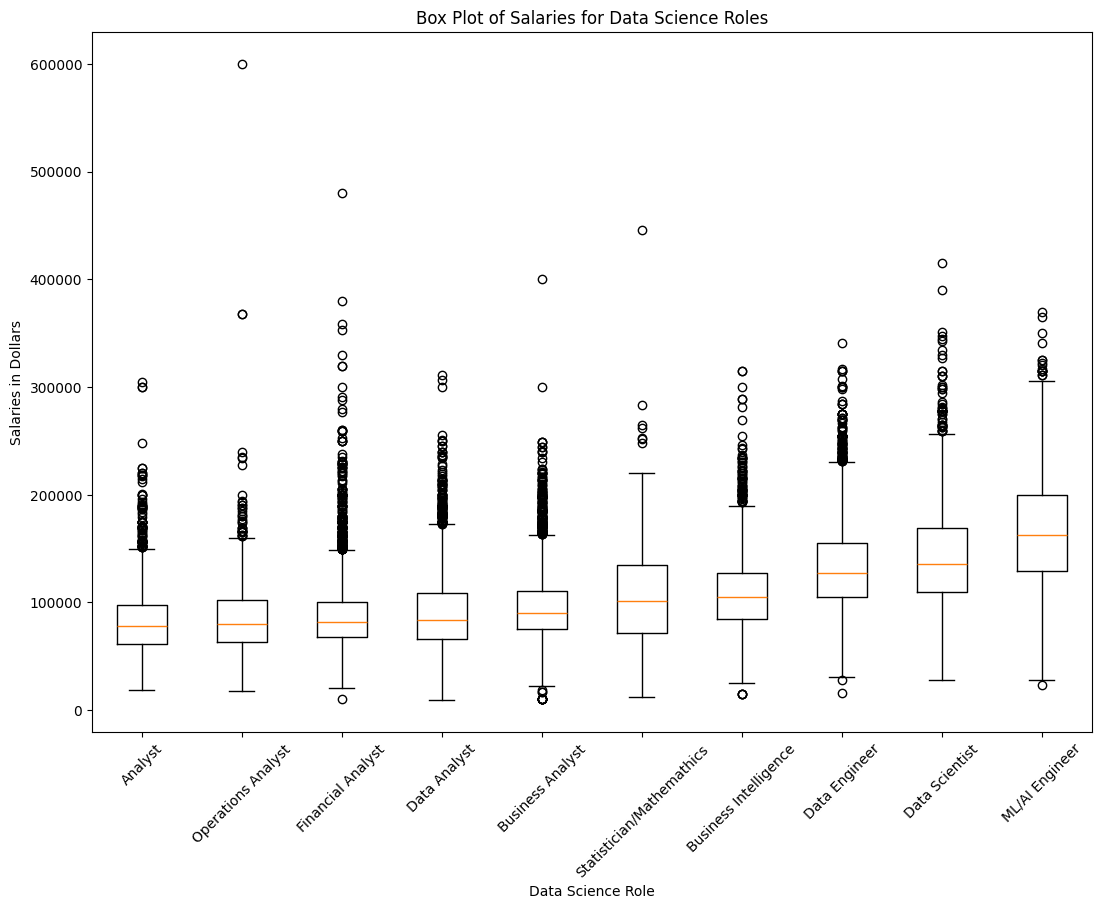

In [58]:
b_analyst= data[data["Jobs_Group"]== "Business Analyst"]["Mean_Salary"].dropna().tolist()
op_analyst = data[data["Jobs_Group"]== "Operations Analyst"]["Mean_Salary"].dropna().tolist()
fin_analyst =data[data["Jobs_Group"]== "Financial Analyst"]["Mean_Salary"].dropna().tolist()
business_int = data[data["Jobs_Group"]== "Business Intelligence"]["Mean_Salary"].dropna().tolist()
data_analyst = data[data["Jobs_Group"]== "Data Analyst"]["Mean_Salary"].dropna().tolist()
analyst = data[data["Jobs_Group"]== "Analyst"]["Mean_Salary"].dropna().tolist()
data_engineer = data[data["Jobs_Group"]== "Data Engineer"]["Mean_Salary"].dropna().tolist()
data_scientist = data[data["Jobs_Group"]== "Data Scientist"]["Mean_Salary"].dropna().tolist()
statistician = data[data["Jobs_Group"]== "Statistician/Mathemathics"]["Mean_Salary"].dropna().tolist()
ml_engineer = data[data["Jobs_Group"]== "ML/AI Engineer"]["Mean_Salary"].dropna().tolist()

job_list= [b_analyst,
           op_analyst,
           fin_analyst,
           business_int,
           data_analyst,
           analyst,
           data_engineer,
           data_scientist,
           statistician,
           ml_engineer
           ]

labels = ['Business Analyst', 'Operations Analyst', 'Financial Analyst',
       'Business Intelligence', 'Data Analyst', 'Analyst',
       'Data Engineer', 'Data Scientist', 'Statistician/Mathemathics',
       'ML/AI Engineer']

medians= [np.median(salaries) for salaries in job_list]

sorted_indices = np.argsort(medians)

sorted_job_list =[job_list[i] for i in sorted_indices]
sorted_job_labels =[labels[i] for i in sorted_indices]
fig = plt.figure(figsize = (10,7))

ax = fig.add_axes([0,0,1,1])

bp =  ax.boxplot(sorted_job_list, labels=  sorted_job_labels)
plt.xticks(rotation = 45)

plt.title("Salaries for Data Science Titles")
plt.ylabel("Salaries in Dollars")
plt.xlabel("Data Science Role")
plt.show()